In [ ]:
# 🛡️ JobShield AI
### Fake Job Offer Detection using Machine Learning + Risk Intelligence

#This project classifies job descriptions as **Real** or **Fake** to prevent recruitment-stage scams and trafficking.


In [ ]:
!pip install -q scikit-learn pandas numpy matplotlib joblib


In [ ]:
import numpy as np
import pandas as pd
import re
import string
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


In [ ]:
df = pd.read_csv("/fake_job_postings.csv")
df.head()


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [ ]:
print("Shape:", df.shape)
print("\nColumns:", df.columns)
print("\nFraud Count:\n", df["fraudulent"].value_counts())


Shape: (17880, 18)

Columns: Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

Fraud Count:
 fraudulent
0    17014
1      866
Name: count, dtype: int64


In [ ]:
df = df[["title", "location", "company_profile", "description", "requirements", "fraudulent"]]
df = df.fillna("")
df.head()


,title,location,company_profile,description,requirements,fraudulent
0,Marketing Intern,"US, NY, New York","We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland","90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,0
3,Account Executive - Washington DC,"US, DC, Washington",Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",0
4,Bill Review Manager,"US, FL, Fort Worth",SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,0


In [ ]:
df["text"] = (
    df["title"] + " " +
    df["location"] + " " +
    df["company_profile"] + " " +
    df["description"] + " " +
    df["requirements"]
)


In [ ]:
def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+", " ", text)   # remove links
    text = re.sub(r"\d+", " ", text)       # remove digits
    text = text.translate(str.maketrans("", "", string.punctuation))
    text = re.sub(r"\s+", " ", text)
    return text.strip()

df["clean_text"] = df["text"].apply(preprocess_text)


In [ ]:
X = df["clean_text"]
y = df["fraudulent"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train size:", len(X_train))
print("Test size:", len(X_test))


Train size: 14304
Test size: 3576


In [ ]:
vectorizer = TfidfVectorizer(
    max_features=15000,
    stop_words="english"
)

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

print("Vectorized shape:", X_train_vec.shape)


Vectorized shape: (14304, 15000)


In [ ]:
model = LogisticRegression(max_iter=2000, class_weight="balanced")
model.fit(X_train_vec, y_train)


LogisticRegression(class_weight='balanced', max_iter=2000)

In [ ]:
y_pred = model.predict(X_test_vec)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3403
           1       0.71      0.88      0.79       173

    accuracy                           0.98      3576
   macro avg       0.85      0.93      0.89      3576
weighted avg       0.98      0.98      0.98      3576



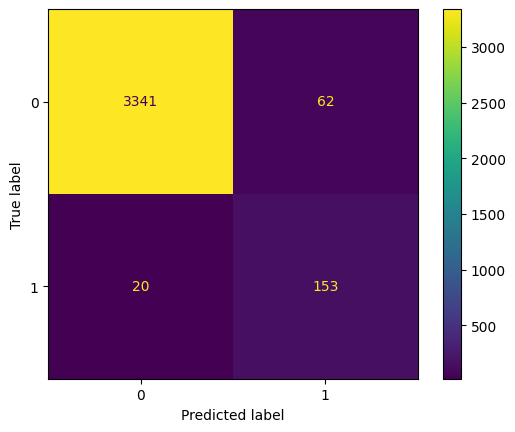

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()


In [ ]:
feature_names = vectorizer.get_feature_names_out()
coeff = model.coef_[0]

top_fake_words = sorted(
    zip(feature_names, coeff),
    key=lambda x: x[1],
    reverse=True
)[:25]

top_real_words = sorted(
    zip(feature_names, coeff),
    key=lambda x: x[1]
)[:25]

print("Top FAKE-indicating words:\n", top_fake_words[:10])
print("\nTop REAL-indicating words:\n", top_real_words[:10])


Top FAKE-indicating words:
 [('entry', np.float64(4.256830925540989)), ('accion', np.float64(3.8735316497555052)), ('linkurl', np.float64(3.716922040964778)), ('money', np.float64(3.706529666895964)), ('phone', np.float64(3.535313843096888)), ('aptitude', np.float64(3.321880872307661)), ('clerk', np.float64(3.2223180316854743)), ('financing', np.float64(3.11471676433625)), ('earn', np.float64(2.9902453618507323)), ('administrative', np.float64(2.9484237507495816))]

Top REAL-indicating words:
 [('companies', np.float64(-3.8054316375798383)), ('team', np.float64(-3.8040270734946633)), ('digital', np.float64(-2.8785214317707974)), ('clients', np.float64(-2.8563591280692076)), ('search', np.float64(-2.756511817543319)), ('english', np.float64(-2.707361675440627)), ('software', np.float64(-2.578142781899911)), ('love', np.float64(-2.3071090484274337)), ('right', np.float64(-2.3058593402103007)), ('based', np.float64(-2.288501456659514))]


In [ ]:
def risk_level(prob_fake):
    if prob_fake >= 0.75:
        return "HIGH RISK"
    elif prob_fake >= 0.45:
        return "MEDIUM RISK"
    else:
        return "LOW RISK"


In [ ]:
def trafficking_signals(text):
    t = text.lower()
    signals = []

    if "passport" in t:
        signals.append("Passport demanded")
    if "visa" in t:
        signals.append("Visa mentioned")
    if "registration fee" in t or "fee" in t:
        signals.append("Payment / fee demanded")
    if "no interview" in t:
        signals.append("No interview recruitment")
    if "urgent" in t or "immediate joining" in t:
        signals.append("Pressure hiring")
    if "whatsapp" in t or "telegram" in t:
        signals.append("Recruitment via WhatsApp/Telegram")
    if "dubai" in t or "qatar" in t or "thailand" in t:
        signals.append("Overseas job risk")

    return signals


In [ ]:
def predict_job(text):
    clean = preprocess_text(text)
    vec = vectorizer.transform([clean])

    prob = model.predict_proba(vec)[0]
    prob_fake = prob[1]

    pred = 1 if prob_fake >= 0.5 else 0

    return {
        "prediction": "Fake Job" if pred == 1 else "Real Job",
        "prob_fake": round(float(prob_fake), 3),
        "risk_level": risk_level(prob_fake),
        "signals": trafficking_signals(text)
    }


In [ ]:
demo = """
Urgent hiring for girls abroad.
No interview required.
Free visa and ticket.
Pay registration fee now.
Contact WhatsApp +971123456789
"""

result = predict_job(demo)
result


{'prediction': 'Fake Job',
 'prob_fake': 0.678,
 'risk_level': 'MEDIUM RISK',
 'signals': ['Visa mentioned',
  'Payment / fee demanded',
  'No interview recruitment',
  'Pressure hiring',
  'Recruitment via WhatsApp/Telegram']}

In [ ]:
def highlight_words(text, words):
    out = text
    for w in words:
        out = re.sub(rf"\b({re.escape(w)})\b", r"[⚠️\1]", out, flags=re.IGNORECASE)
    return out

risk_words = [w for w, _ in top_fake_words[:15]]
print(highlight_words(demo, risk_words))



Urgent hiring for girls abroad.
No interview required.
Free visa and ticket.
Pay registration fee now.
Contact WhatsApp +971123456789



In [ ]:
def batch_scan(text_list):
    results = []
    for t in text_list:
        r = predict_job(t)
        results.append({
            "text": t[:120],
            "prediction": r["prediction"],
            "prob_fake": r["prob_fake"],
            "risk_level": r["risk_level"],
            "signals_found": len(r["signals"])
        })
    return pd.DataFrame(results)


In [ ]:
samples = [
    "Hiring accountant in Delhi. Full time. Company website available.",
    "Urgent job in Dubai. No interview. Pay visa fee now.",
    "Work from home typing job. Earn 8000/day. Join Telegram."
]

batch_scan(samples)


,text,prediction,prob_fake,risk_level,signals_found
0,Hiring accountant in Delhi. Full time. Company...,Fake Job,0.566,MEDIUM RISK,0
1,Urgent job in Dubai. No interview. Pay visa fe...,Real Job,0.392,LOW RISK,5
2,Work from home typing job. Earn 8000/day. Join...,Fake Job,0.852,HIGH RISK,1


In [ ]:
import joblib

joblib.dump(model, "jobshield_model.pkl")
joblib.dump(vectorizer, "jobshield_vectorizer.pkl")

print("Saved model + vectorizer!")


Saved model + vectorizer!


In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output

text_area = widgets.Textarea(
    placeholder="Paste job offer here...",
    layout=widgets.Layout(width="100%", height="150px")
)

button = widgets.Button(description="Analyze", button_style="success")
output = widgets.Output()

def on_click(b):
    with output:
        clear_output()
        text = text_area.value
        if text.strip() == "":
            print("⚠️ Please paste some job text.")
            return

        result = predict_job(text)

        print("🛡️ JobShield AI Result")
        print("==============================")
        print("Prediction:", result["prediction"])
        print("Fake Probability:", result["prob_fake"])
        print("Risk Level:", result["risk_level"])

        if result["signals"]:
            print("\n🚨 Trafficking / Scam Signals:")
            for s in result["signals"]:
                print("-", s)
        else:
            print("\n✅ No trafficking signals detected")

button.on_click(on_click)

display(text_area, button, output)


Textarea(value='', layout=Layout(height='150px', width='100%'), placeholder='Paste job offer here...')

Button(button_style='success', description='Analyze', style=ButtonStyle())

Output()